![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/05/logo-upv-horizontal.png)
![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/06/logos-perte-chip-1024x119.png)


# Laboratory 0.2. Couplers

Today, we will take a brief look at two types of couplers used in integrated photonic circuits. We will perform simulations that will allow us to understand how the following operate: 

1. **Directional Couplers (DC)**

2. **Multimode Interferometers (MMIs)**

## 0. Imports 
(Run once  - before running other codes)

### 0.1. General libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

import gplugins.tidy3d.materials as mat

nm = 1e-3
wavelength = np.linspace(1500, 1600) * nm
f = td.C_0 / wavelength

## LO.1. Directional coupler cross-section in GDSFactory

### 1.1. Materials

In [2]:
nitride_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
nitride_index, nitride_k = td.Medium.eps_complex_to_nk(nitride_complex)
box_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
box_index, box_k = td.Medium.eps_complex_to_nk(box_complex)

### 1.2. Cross-Section Definition

In GDSFactory - Tidy3d modesolver we have another function to easily define the Cross-Section of a Directional Coupler: [gt.modes.WaveguideCoupler()](https://gdsfactory.github.io/gplugins/_autosummary/gplugins.tidy3d.modes.WaveguideCoupler.html). It implements the deep (rib) and shallow (ridge) directional coupler waveguides cross-section, using as input parameters all the dimensions of the waveguide cores and also the distance between them (gap). 

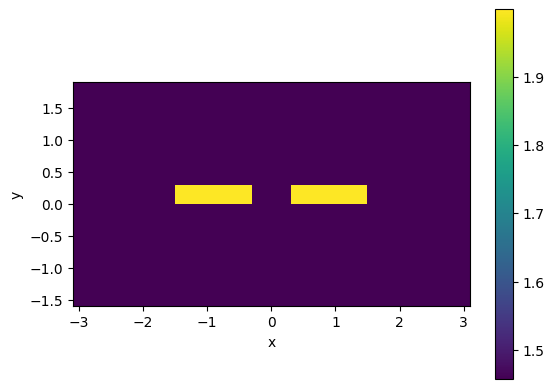

In [19]:
lambda_c = 1.55

dcoupler_cs = gt.modes.WaveguideCoupler(
    # Geometrical Parameters
    core_width=(1.2, 1.2), # Waveguide width
    slab_thickness=0 * nm, # For shallow waveguides - Set to 0 if its a deep-etched waveguide.
    core_thickness=300 * nm, # Waveguide height 
    gap=600 * nm,
    # Materials
    core_material='sin', #  Material of the waveguide
    clad_material='sio2', # Surrounding material
    # Modesolver Parameters
    wavelength=lambda_c, # Wavelength to simulate
    num_modes=6, # Number of modes to find
    cache_path='.cache/', # Important! In order to save simulation time, set your cache Path!
    precision='double',
    max_grid_scaling=1.5, # Parameters of the grid
    grid_resolution=20 # Parameters of the grid
)

dcoupler_cs.plot_index()

### 1.3. Simulations

#### 1.3.1. Parameters

As before, we can calculate the effective index (n_eff), TE and TM fraction for this cross-section using the already implemented class methods: .n_eff, .fraction_te and .fraction_tm. Remember that we will calculate one effective index for each mode (up to num_modes)

In [20]:
dcoupler_neff = dcoupler_cs.n_eff
print(dcoupler_neff)

c:\Users\cfp\Desktop\Diseño_S\test-lab0\pic-upv-lab0\.venv\Lib\site-packages\tidy3d\components\mode\derivatives.py:14: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxf = sp.csr_matrix(sp.diags([-1, 1], [0, 1], shape=(Nx, Nx)))
c:\Users\cfp\Desktop\Diseño_S\test-lab0\pic-upv-lab0\.venv\Lib\site-packages\tidy3d\components\mode\derivatives.py:27: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxb = sp.csr_matrix(sp.diags([1, -1], [0, -1], shape=(Nx, Nx)))
c:\Users\cfp\Desktop\Diseño_S\test-lab0\pic-upv-lab0\.venv\

09:59:11 Hora estándar romance WARNING: Mode field at frequency index 0, mode   
                               index 5 does not decay at the plane boundaries.  

2026-02-16 09:59:11.974 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache\WaveguideCoupler_6d726fc537154b39.npz.
[1.60942484+1.02849974e-04j 1.60116589+9.83178135e-05j
 1.53540293+1.77367472e-04j 1.52057329+1.77190584e-04j
 1.45637592+1.78980401e-04j 1.44042642+2.10123701e-04j]


Podemos observar que se propagan los 5 primeros modos menos el último, ya que este ve un índice efectivo menor al del cladding.

In [21]:
dcoupler_cs.fraction_te

array([0.994898  , 0.99527537, 0.00888064, 0.01130183, 0.97648502,
       0.35301659])

In [22]:
dcoupler_cs.fraction_tm

array([0.005102  , 0.00472463, 0.99111936, 0.98869817, 0.02351498,
       0.64698341])

#### 1.3.2. Plots

We could also plot the fields for each mode identified. Remember: the 'Ex' field component corresponds to TE modes, while the 'Ey' field component corresponds to TM modes. In the case of the directional coupler, the even and odd modes play a key role in facilitating energy exchange between the waveguides. Now, let's plot and analyze their behavior.

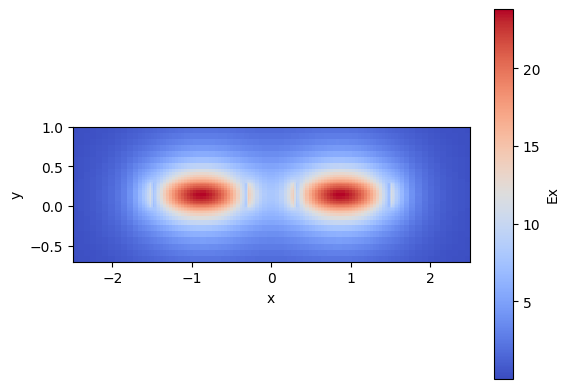

In [23]:
dcoupler_cs.plot_field(mode_index=0 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)
) # 

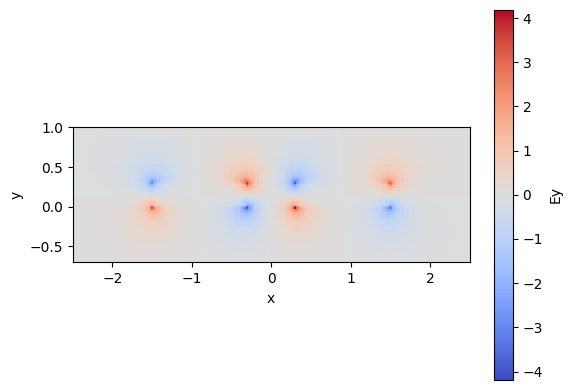

In [55]:
dcoupler_cs.plot_field(mode_index=0 , # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)
) # 

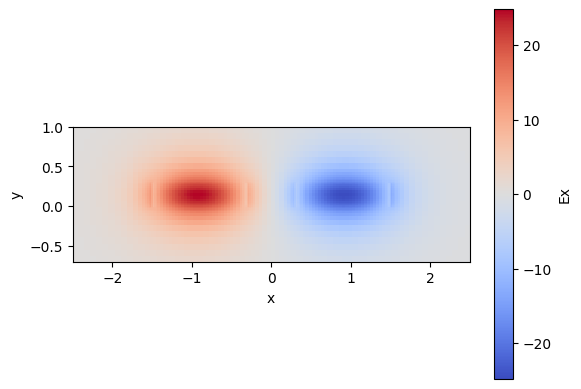

In [24]:
dcoupler_cs.plot_field(mode_index=1 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

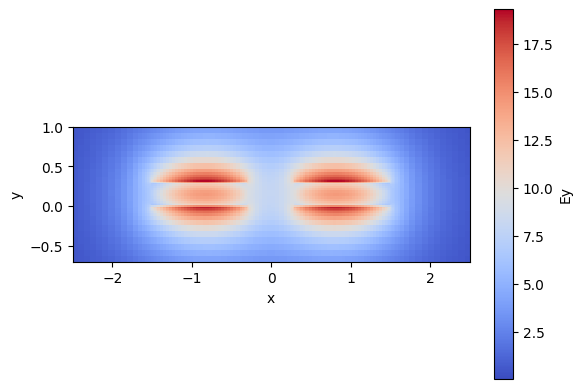

In [50]:
dcoupler_cs.plot_field(mode_index=2 , # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

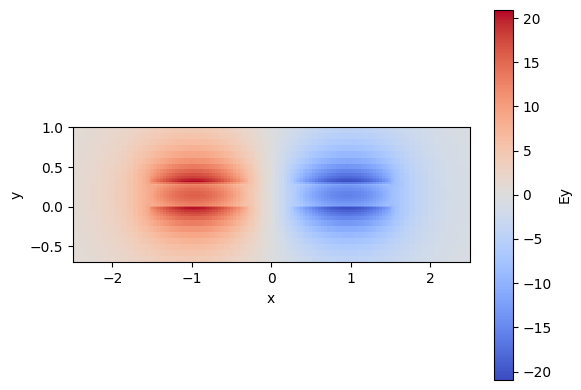

In [45]:
dcoupler_cs.plot_field(mode_index=3, # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

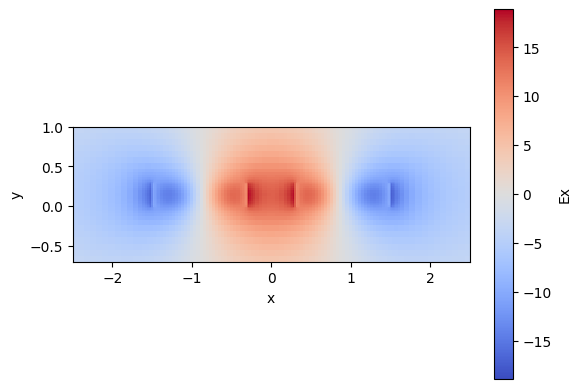

In [54]:
dcoupler_cs.plot_field(mode_index=4 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

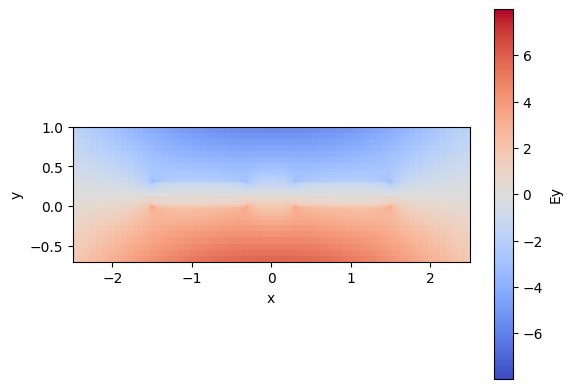

In [52]:
dcoupler_cs.plot_field(mode_index=5 , # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-2.5, 2.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

#### 1.3.3. Beating or Coupling Length calculation (𝐿𝜋)

The key parameter that determines the design of a directional coupler is the coupling or beating length. This length defines the total size of the coupling region required to transfer all the optical power from one waveguide to another. It is determined by the difference between the effective indices of the cross-section's odd and even modes:

In [27]:
# TE Modes: Modes 0 & 1
L_pi_TE = 0.5*lambda_c/(dcoupler_neff[0].real-dcoupler_neff[1].real)
print(L_pi_TE)

L_pi_TM =  0.5*lambda_c/(dcoupler_neff[2].real-dcoupler_neff[3].real)
print(L_pi_TM)

93.837675367005
52.26022367757757


GDSFactory has its own method implemented to calculate the coupling length: [.coupling_length()](https://gdsfactory.github.io/gplugins/_autosummary/gplugins.tidy3d.modes.WaveguideCoupler.html)

In [28]:
dcoupler_cs.coupling_length()

array([93.83767537, 52.26022368, 48.59087715])

## LO.2. Multimode Interference (MMI) Coupler cross-section

### 1.1. Cross-Section definition and simulation

In GDSFactory - Tidy3d modesolver, we can simulate the Cross-Section of a multimode interference coupler using the previously studied : [gt.modes.Waveguide()](https://gdsfactory.github.io/gplugins/_autosummary/gplugins.tidy3d.modes.Waveguide.html) function. The parameters will correspond to the dimensions of the MMI body section. 

In [35]:
mmi_body_w = 12  
lambda_c = 1550*nm

mmi_body_waveguide = gt.modes.Waveguide(
    # Geometrical Parameters
    core_width=mmi_body_w, # MMI Body width
    core_thickness=300 * nm, # MMI Body height 
    slab_thickness=0 * nm, # For shallow waveguides - Set to 0 if its a deep-etched waveguides.
    # Materials
    core_material='sin', #  Material of the waveguide
    clad_material='sio2', # Surrounding material
    # Modesolver Parameters
    wavelength=lambda_c, # Wavelength to simulate
    num_modes=30, # Targeted number of modes to find - Higher than before! It's a multimode section
    max_grid_scaling=1.5, # Parameters of the grid
    grid_resolution=20, # Parameters of the grid
    cache_path='.cache/', # Important! In order to save simulation time, set your cache Path!
    precision='double',
)

mmi_body_waveguide.n_eff

c:\Users\cfp\Desktop\Diseño_S\test-lab0\pic-upv-lab0\.venv\Lib\site-packages\tidy3d\components\mode\derivatives.py:14: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxf = sp.csr_matrix(sp.diags([-1, 1], [0, 1], shape=(Nx, Nx)))
c:\Users\cfp\Desktop\Diseño_S\test-lab0\pic-upv-lab0\.venv\Lib\site-packages\tidy3d\components\mode\derivatives.py:27: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxb = sp.csr_matrix(sp.diags([1, -1], [0, -1], shape=(Nx, Nx)))
c:\Users\cfp\Desktop\Diseño_S\test-lab0\pic-upv-lab0\.venv\

10:04:51 Hora estándar romance WARNING: Mode field at frequency index 0, mode   
                               index 24 does not decay at the plane boundaries. 

                               WARNING: Mode field at frequency index 0, mode   
                               index 25 does not decay at the plane boundaries. 

                               WARNING: Mode field at frequency index 0, mode   
                               index 27 does not decay at the plane boundaries. 

                               WARNING: Mode field at frequency index 0, mode   
                               index 28 does not decay at the plane boundaries. 

                               WARNING: Mode field at frequency index 0, mode   
                               index 29 does not decay at the plane boundaries. 

2026-02-16 10:04:52.013 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache\Waveguide_15433edbed8fc2d0.npz.


array([1.6786595 +7.78934672e-05j, 1.67512732+7.81571827e-05j,
       1.66922847+7.86028340e-05j, 1.66094525+7.92401466e-05j,
       1.65025312+8.00839409e-05j, 1.63712124+8.11557006e-05j,
       1.6215135 +8.24863265e-05j, 1.60339058+8.41212350e-05j,
       1.58271457+8.61311110e-05j, 1.5774205 +1.66068730e-04j,
       1.57388942+1.66498915e-04j, 1.56799588+1.67223410e-04j,
       1.55972723+1.68258132e-04j, 1.5594584 +8.86366882e-05j,
       1.54906903+1.69617736e-04j, 1.53601168+1.71243999e-04j,
       1.53362692+9.19569892e-05j, 1.52054265+1.73463904e-04j,
       1.5053405 +9.64082096e-05j, 1.50269423+1.76086968e-04j,
       1.48257196+1.79388862e-04j, 1.4750929 +1.04662871e-04j,
       1.46055739+1.83954929e-04j, 1.44602702+1.38735742e-04j,
       1.44427255+2.13138695e-04j, 1.44154639+2.15937624e-04j,
       1.43845554+1.93429161e-04j, 1.43685358+2.16442381e-04j,
       1.43133766+1.97271657e-04j, 1.43033094+2.15440791e-04j])

Podemos observar que se propagan los 25 primeros modos.

In [36]:
mmi_body_waveguide.fraction_te

array([9.99991904e-01, 9.99967183e-01, 9.99924497e-01, 9.99861445e-01,
       9.99774272e-01, 9.99657368e-01, 9.99502382e-01, 9.99296461e-01,
       9.99013009e-01, 2.38565216e-04, 9.55099424e-04, 2.13831793e-03,
       3.73633926e-03, 9.98594348e-01, 5.78997522e-03, 9.32192911e-03,
       9.96954269e-01, 1.09103635e-02, 9.97247761e-01, 1.38536944e-02,
       1.69467184e-02, 9.95776123e-01, 1.98944330e-02, 9.71035840e-01,
       5.87218497e-02, 2.41834581e-03, 2.08842314e-02, 1.51438309e-02,
       8.39470852e-01, 1.90596366e-01])

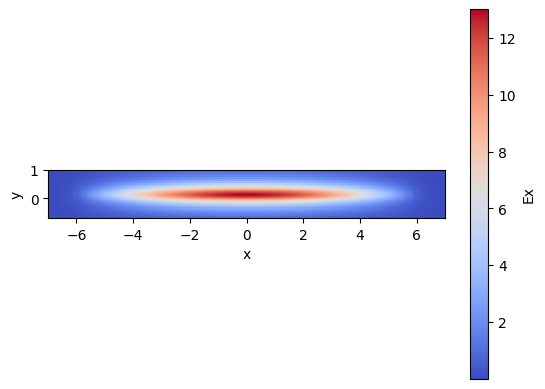

In [37]:
mmi_body_waveguide.plot_field(mode_index=0 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-7, 7), # Set the x and y limits
                          ylim=(-0.7, 1)
) # 

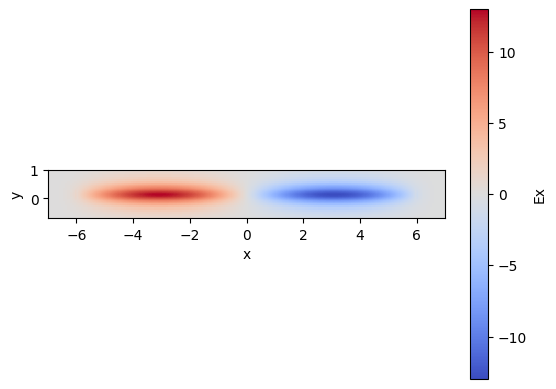

In [38]:
mmi_body_waveguide.plot_field(mode_index=1 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-7, 7), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

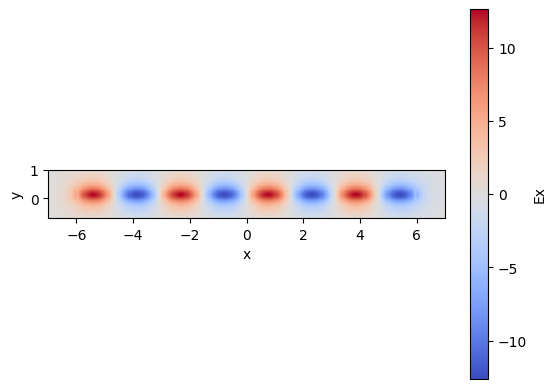

In [39]:
mmi_body_waveguide.plot_field(mode_index=7, # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-7, 7), # Set the x and y limits
                          ylim=(-0.7, 1)) #

#### 1.1.2 Beating Length calculation (𝐿𝜋)

With this information, we could calculate our first guess for the beating length (𝐿𝜋) of the MMI coupler:

In [40]:
d_n_eff = mmi_body_waveguide.n_eff[0].real -  mmi_body_waveguide.n_eff[1].real

L_pi = 0.5*lambda_c/(d_n_eff)

print (L_pi)

219.41119794399182
